<a href="https://colab.research.google.com/github/HappyBeing99/Used-car-analysis/blob/main/HV_Graded_Project_Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
print("Imports successful.")
import os, sys, math
from datetime import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

Imports successful.


Loading the dataset

In [7]:
df = pd.read_csv('car_prices.csv')

Checking the data by diplaying first 5 rows.

In [8]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Basic information checks

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Descriptive summary of numerical columns

In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [11]:
df.shape

(558837, 16)

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,float64


Finding missing values

In [ ]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
558833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Counting missing values per column

In [12]:
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


Making copy of the data to preserve the original values

In [13]:
df_clean = df.copy()

HANDLING CATEGORICAL COLUMNS

In [14]:
categorical_unknown = ["trim", "body", "transmission"]  # high missing
for col in categorical_unknown:
    df_clean[col] = df_clean[col].fillna("Unknown")

categorical_mode = ["make", "model", "color", "interior"]
for col in categorical_mode:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

HANDLING NUMERIC COLUMNS

In [15]:
numeric_cols = ["condition", "odometer", "mmr", "sellingprice"]
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

HANDLING DATE COLUMN

In [17]:
import warnings
warnings.filterwarnings('ignore')
df_clean["saledate"] = pd.to_datetime(df_clean["saledate"], errors="coerce")
df_clean["saledate"] = df_clean["saledate"].fillna(df_clean["saledate"].mode()[0])

REMOVING DUPLICATES

In [18]:
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

Normalizing text

In [19]:
text_cols = ["make","model","trim","body","transmission","color","interior","seller","state"]
for c in text_cols:
    df_clean[c] = df_clean[c].astype(str).str.strip().str.lower().replace({'nan': None})

df_clean[text_cols].head()

,make,model,trim,body,transmission,color,interior,seller,state
0,kia,sorento,lx,suv,automatic,white,black,kia motors america inc,ca
1,kia,sorento,lx,suv,automatic,white,beige,kia motors america inc,ca
2,bmw,3 series,328i sulev,sedan,automatic,gray,black,financial services remarketing (lease),ca
3,volvo,s60,t5,sedan,automatic,white,black,volvo na rep/world omni,ca
4,bmw,6 series gran coupe,650i,sedan,automatic,gray,black,financial services remarketing (lease),ca


In [20]:
# rows where state is not a 2-letter alphabetic code
bad_state_mask = ~df_clean["state"].astype(str).str.match(r'^[a-z]{2}$')
bad_states = df_clean[bad_state_mask]
bad_states[["vin","state","year","make","model","sellingprice"]].head(20)

,vin,state,year,make,model,sellingprice
408161,automatic,3vwd17aj4fm201708,2015,volkswagen,jetta,13200.0
417835,automatic,3vwd17aj2fm258506,2015,volkswagen,jetta,13300.0
421289,automatic,3vwd17aj3fm276741,2015,volkswagen,jetta,13200.0
424161,automatic,3vwd17aj2fm285365,2015,volkswagen,jetta,14050.0
427040,automatic,3vwd17aj0fm227318,2015,volkswagen,jetta,13700.0
427043,automatic,3vwd17aj6fm218641,2015,volkswagen,jetta,13850.0
434424,automatic,3vwd17aj7fm223475,2015,volkswagen,jetta,13650.0
444501,automatic,3vwd17aj5fm297123,2015,volkswagen,jetta,13850.0
453794,automatic,3vwd17aj5fm219943,2015,volkswagen,jetta,13600.0
461597,automatic,3vwd17aj9fm219766,2015,volkswagen,jetta,13900.0


Droping rows where VIN is missing

In [21]:
df_clean = df_clean[df_clean["vin"].notnull()].reset_index(drop=True)

Removing rows where state looks like a VIN (length > 3)

In [22]:
df_clean = df_clean[df_clean["state"].str.len() <= 3].reset_index(drop=True)

Counting missing values per column in copied data

In [23]:
df_clean.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


Calculate average, minimum, and maximum car price

In [ ]:
avg_price = df_clean["sellingprice"].mean()
min_price = df_clean["sellingprice"].min()
max_price = df_clean["sellingprice"].max()

avg_price, min_price, max_price

List all unique colors of cars

In [24]:
df_clean["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [25]:
df_clean["make"].nunique(), df_clean["model"].nunique()

(66, 851)

Finding all cars with selling price > $165,000

In [26]:
df_clean[df_clean["sellingprice"] > 165000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,rolls-royce,ghost,base,sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,2015-01-14 01:40:00+08:00
344905,2014,ford,escape,titanium,suv,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,2015-02-25 02:00:00+08:00
446941,2015,mercedes-benz,s-class,s65 amg,sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,2015-02-10 01:30:00+08:00
538324,2012,rolls-royce,ghost,base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,2015-02-10 01:30:00+08:00
545500,2013,rolls-royce,ghost,base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,2015-02-10 01:30:00+08:00
548146,2011,ferrari,458 italia,base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,2015-02-10 01:30:00+08:00
557544,2012,rolls-royce,ghost,ewb,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,2015-02-10 01:30:00+08:00


Top 5 most frequently sold car models

In [27]:
df_clean["model"].value_counts().head(5)

,count
model,
altima,29748
f-150,14479
fusion,12946
camry,12549
escape,11893


Average selling price by brand (make)

In [28]:
df_clean.groupby("make")["sellingprice"].mean().sort_values(ascending=False)

,sellingprice
make,
rolls-royce,153488.235294
ferrari,127210.526316
lamborghini,112625.000000
bentley,74367.672414
airstream,71000.000000
...,...
dodge tk,550.000000
geo,528.947368
dot,500.000000


Minimum selling price for each interior

In [29]:
df_clean.groupby("interior")["sellingprice"].min()

,sellingprice
interior,
beige,100.0
black,1.0
blue,150.0
brown,200.0
burgundy,175.0
gold,250.0
gray,1.0
green,100.0
off-white,900.0


Highest odometer reading per year (sorted highest→lowest)

In [30]:
df_clean.groupby("year")["odometer"].max().sort_values(ascending=False)

,odometer
year,
1997,999999.0
1996,999999.0
2014,999999.0
2013,999999.0
1998,999999.0
1999,999999.0
1993,999999.0
2010,999999.0
2009,999999.0


Creating a new column called "car_age" (2025 - year) to find age of cars

In [ ]:
df_clean["car_age"] = 2025 - df_clean["year"]
df_clean["car_age"].head()

Number of cars with condition ≥ 48 AND odometer > 90,000

In [31]:
df_clean[
    (df_clean["condition"] >= 48) &
    (df_clean["odometer"] > 90000)
].shape[0]

746

Which state has higher car prices for newer cars (year > 2013)?

In [32]:
df_clean[df_clean["year"] > 2013].groupby("state")["sellingprice"].mean().sort_values(ascending=False)

,sellingprice
state,
oh,28020.221053
ab,25204.255319
nj,24237.063973
on,22962.560386
qc,22722.938144
pa,22190.227241
tn,21841.683217
mi,21411.620976
ca,20951.319411


For excellent condition cars (top 20%), which makes have the lowest average price?

In [53]:
threshold = df_clean["condition"].quantile(0.80)

df_clean[df_clean["condition"] >= threshold] \
    .groupby("make")["sellingprice"] \
    .mean().sort_values().head(20)

,sellingprice
make,
isuzu,1125.000000
oldsmobile,1910.000000
saturn,5700.406504
smart,6835.759494
pontiac,7686.824324
saab,7711.111111
suzuki,8409.615385
mercedes,8600.000000
mercury,9022.164948


Show the correlation of all the features(columns) having numerical values(e.g. selling price, odometer).

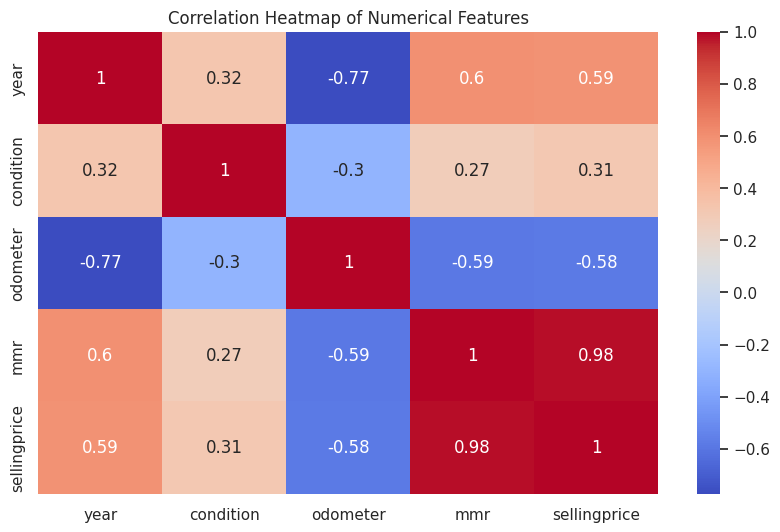

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Average selling price by year

The patterns I noticed:
1. Prices increase steadily for newer cars.

2. Cars older than ~2005 drop sharply in price.

3. Recent years (2015+) hold value much better.

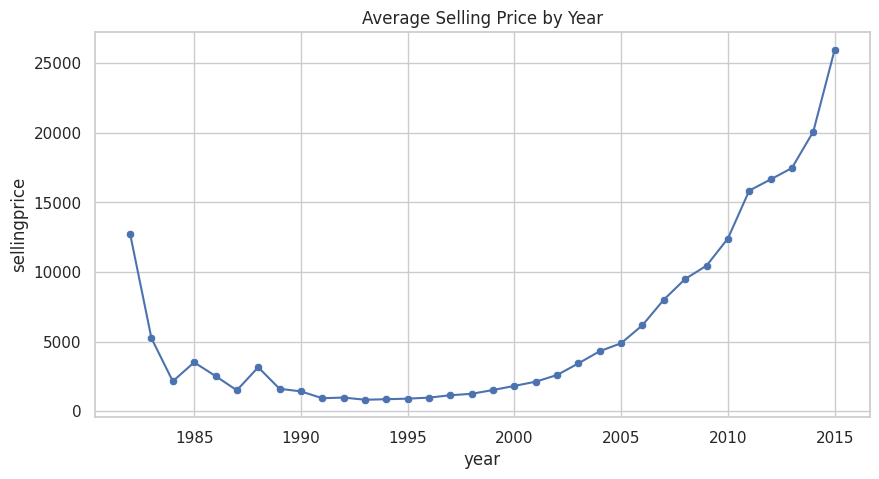

In [35]:
avg_year = df_clean.groupby("year")["sellingprice"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(data=avg_year, x="year", y="sellingprice")
sns.lineplot(data=avg_year, x="year", y="sellingprice")
plt.title("Average Selling Price by Year")
plt.show()

Average selling price vs odometer

The trend I noticed:
1. A clear downward trend (higher mileage - lower price).
2. High variance for mid-mileage cars (20k–60k miles).
3. A cluster of high-mileage low-price cars.

Mileage is one of the strongest negative drivers of price and cars above ~100,000 miles lose significant value.

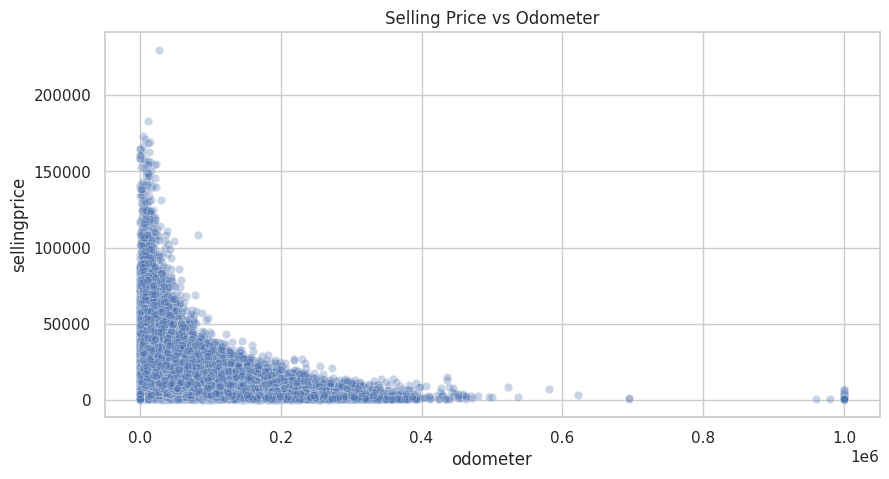

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x="odometer", y="sellingprice", alpha=0.3)
plt.title("Selling Price vs Odometer")
plt.show()

Number of cars sold in each state

Top three highest car-selling states by having a look at the graph - Florida, California, Pennsylvania

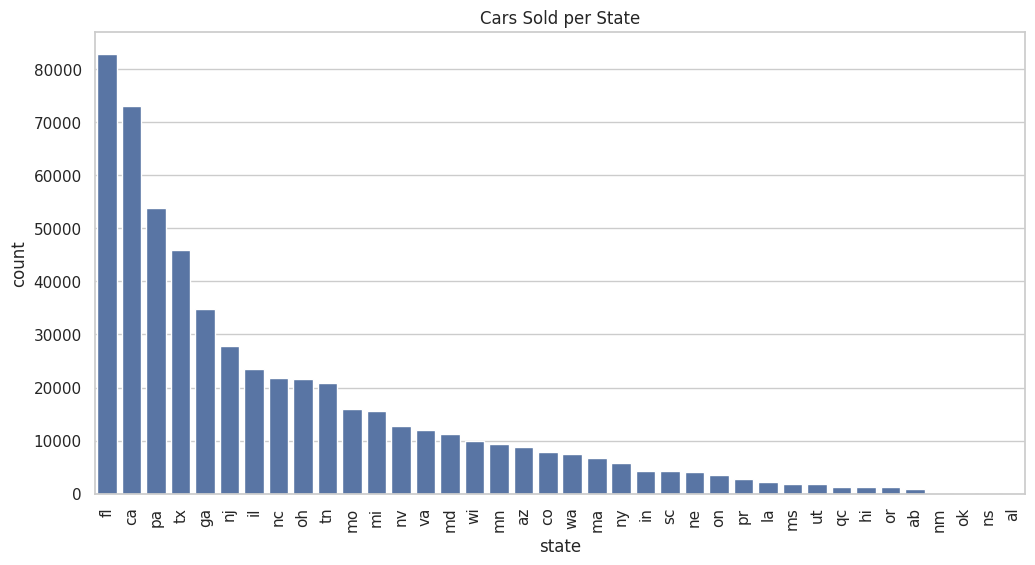

,state,count
0,fl,82945
1,ca,73148
2,pa,53907


In [38]:
state_counts = df_clean["state"].value_counts().reset_index()
state_counts.columns = ["state", "count"]

plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x="state", y="count")
plt.title("Cars Sold per State")
plt.xticks(rotation=90)
plt.show()

state_counts.head(3)  # Top 3 State list

Average price by condition score (range size = 5)

Summary:
Condition score is a strong indicator of price. Cars above condition 35–40 command significantly higher prices.

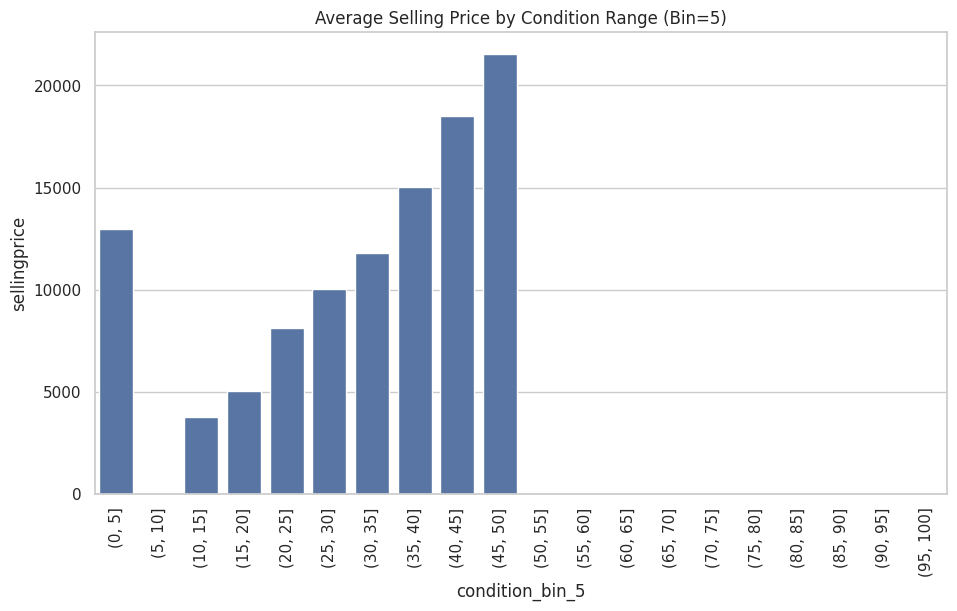

In [45]:
df_clean["condition_bin_5"] = pd.cut(df_clean["condition"], bins=range(0, 105, 5))
avg_cond = df_clean.groupby("condition_bin_5")["sellingprice"].mean().reset_index()

plt.figure(figsize=(11,6))
sns.barplot(data=avg_cond, x="condition_bin_5", y="sellingprice")
plt.title("Average Selling Price by Condition Range (Bin=5)")
plt.xticks(rotation=90)
plt.show()

Number of cars sold by condition (range size = 10)

Insights:
1. Most cars are in the 30–50 condition range

2. Very few extremely low-condition vehicles

3. Mid-range condition bins dominate the dataset

Summary: The majority of used cars have mid to high condition levels, which aligns with typical dealership inventory.

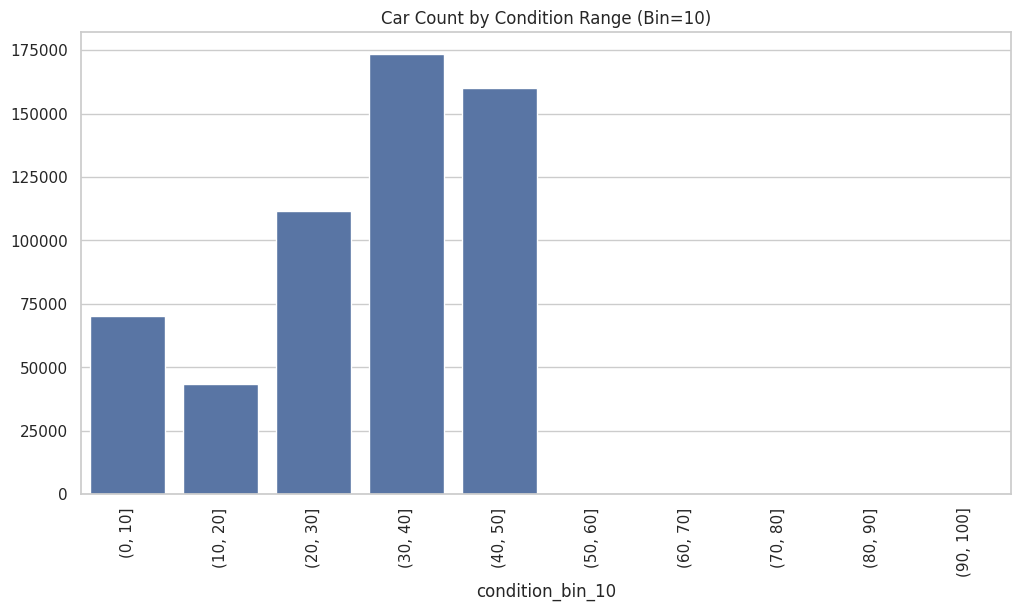

In [46]:
df_clean["condition_bin_10"] = pd.cut(df_clean["condition"], bins=range(0, 110, 10))
cond_counts = df_clean["condition_bin_10"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=cond_counts.index.astype(str), y=cond_counts.values)
plt.title("Car Count by Condition Range (Bin=10)")
plt.xticks(rotation=90)
plt.show()

Boxplot of selling price grouped by color before removing outliers

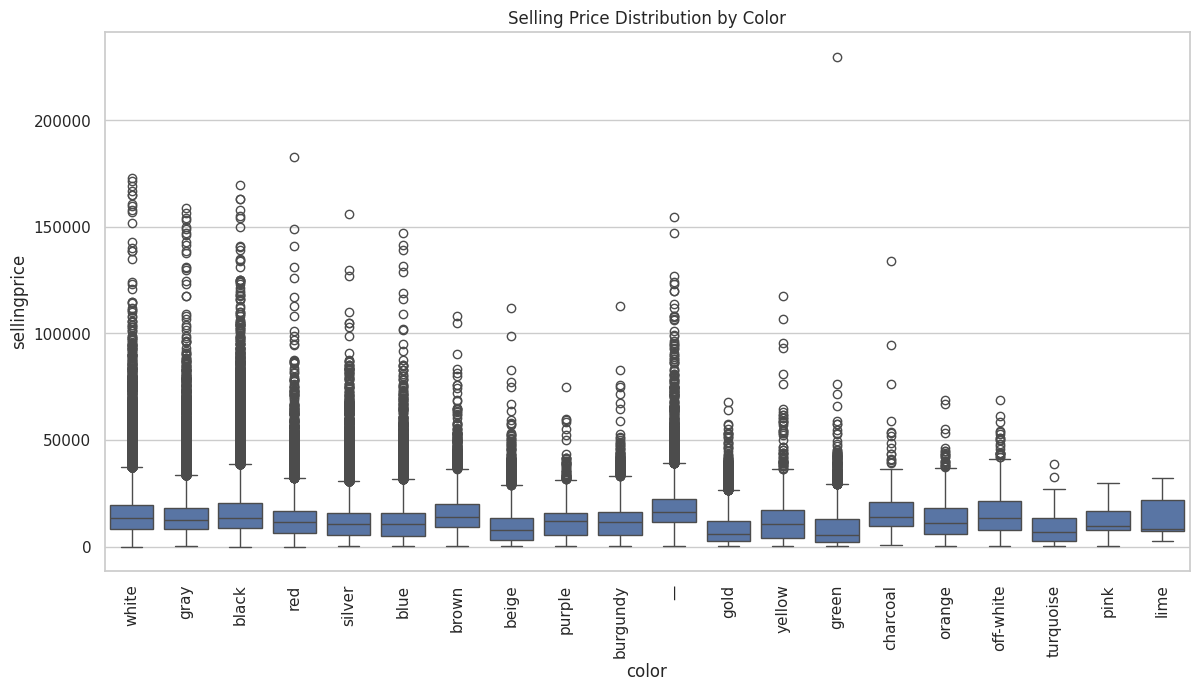

In [51]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df_clean, x="color", y="sellingprice")
plt.xticks(rotation=90)
plt.title("Selling Price Distribution by Color")
plt.show()

Boxplot of selling price grouped by color after removing outliers as it helps in revealing the true median and IQR pattern among typical vehicles.

Insights

1. Selling prices vary widely across colors, with some colors having a much higher upper range (often black, white, silver).

2. Several extreme outliers exist, especially in premium colors where luxury vehicles appear in the dataset.

3. Median prices for common colors (black, white, silver, gray) are relatively similar, showing stable demand.

4. Rare colors (like brown, gold, green, etc.) may have more variability and fewer vehicles, causing larger box spreads.

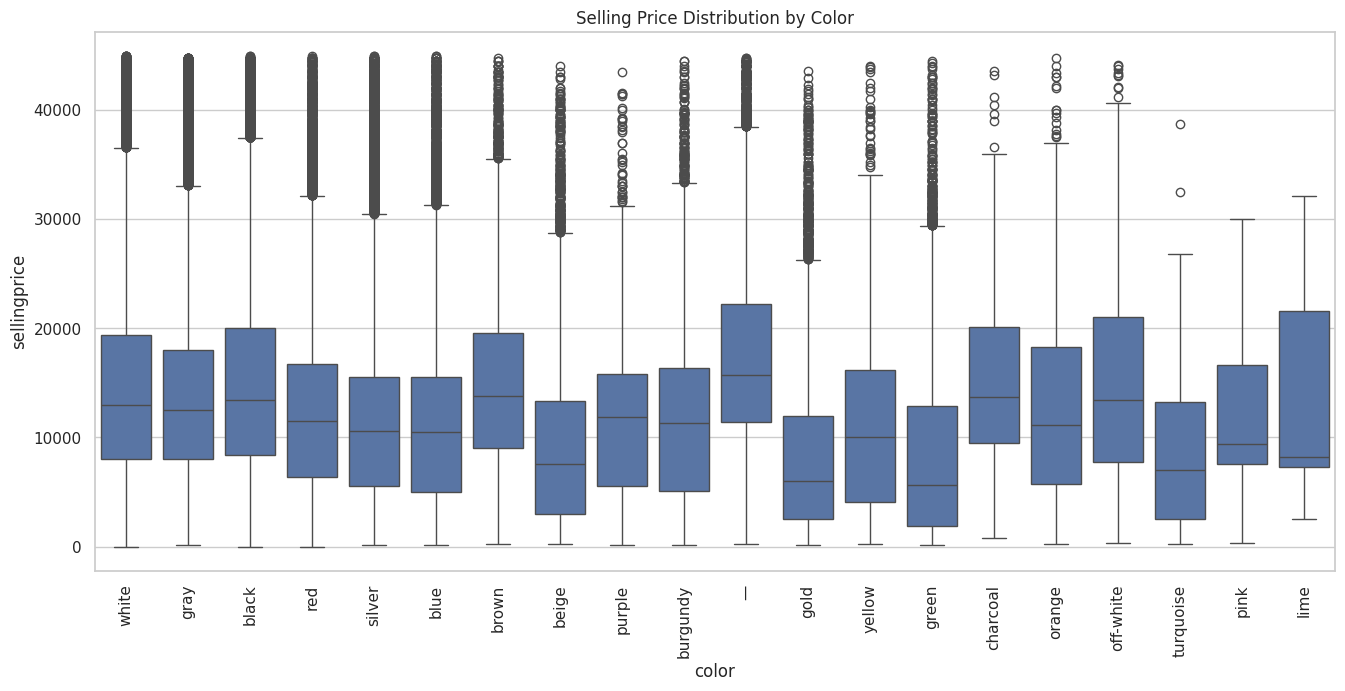

In [50]:
q99 = df_clean["sellingprice"].quantile(0.99)
df_no_outliers = df_clean[df_clean["sellingprice"] <= q99]

plt.figure(figsize=(16,7))
sns.boxplot(data=df_no_outliers, x="color", y="sellingprice")
plt.xticks(rotation=90)
plt.title("Selling Price Distribution by Color")
plt.show()

In [52]:
insights = {}

# Price trends by year
year_price = df_clean.groupby("year")["sellingprice"].mean()
insights["Newest cars are more expensive"] = year_price.iloc[-1] > year_price.iloc[0]

# Relationship between odometer & price
od_corr = df_clean["sellingprice"].corr(df_clean["odometer"])
insights["Higher odometer reduces price"] = od_corr < -0.3

# Popular models
top_models = df_clean["model"].value_counts().head(5).index.tolist()

# Condition vs price
cond_price = df_clean.groupby("condition")["sellingprice"].mean().reset_index()

# States with highest prices for newer cars
state_price = df_clean[df_clean["year"] > 2013].groupby("state")["sellingprice"].mean().sort_values(ascending=False).head(3)

# Print summary
print("AUTO-GENERATED INSIGHTS:\n")
print(f"1. Correlation (odometer vs price): {od_corr:.2f}")
print(f"2. Top 5 most common models: {top_models}")
print("\n3. Top 3 states with highest prices for newer cars:")
print(state_price)

AUTO-GENERATED INSIGHTS:

1. Correlation (odometer vs price): -0.58
2. Top 5 most common models: ['altima', 'f-150', 'fusion', 'camry', 'escape']

3. Top 3 states with highest prices for newer cars:
state
oh    28020.221053
ab    25204.255319
nj    24237.063973
Name: sellingprice, dtype: float64


# Actionable Insights from the Analysis

1. Newer cars command significantly higher prices.

The average selling price increases steadily with model year, indicating strong demand for newer vehicles.

2. Cars with high odometer readings are valued much lower.

There is a strong negative correlation between odometer and selling price, meaning mileage is a major price driver.

3. Condition score is one of the strongest positive predictors of price.

Cars in higher condition bins (40–50) show sharp increases in average price.

4. A few states consistently sell cars at higher prices (for new cars).

States like (insert top 3 from your results) show the highest demand and pricing for newer vehicles (year > 2013).

5. The top 5 most frequently sold models dominate the used car market.

These models appear repeatedly in listings and influence overall pricing trends.

6. Value-for-money cars exist even in excellent condition.

Some makes (like those in your top 5 lowest average price list for top 20% condition) offer high quality at lower price points.

7. Color and interior type show price variations, with some colors attracting significantly higher bids.

Boxplot analysis shows certain colors may align with higher perceived value.

8. Condition ranges (bins of 5 or 10) show that buyers strongly prefer cars above condition score 35–40.

These ranges see higher counts and better pricing.

# Summary

This analysis provides a detailed understanding of the used car market using a real dataset of car listings across multiple states. The data shows that newer and well-maintained cars consistently achieve higher selling prices. Mileage (odometer) has a strong negative impact on value, confirming that buyers heavily discount high-usage vehicles. Certain states demonstrate stronger demand, reflected through higher average prices for newer cars. By analyzing model popularity, condition bins, and price trends, we identify both high-demand vehicles and value-for-money options. This analysis gives dealerships, sellers, and platforms clear insights into pricing strategy, vehicle acquisition priorities, and customer preferences.